#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np

#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Data Loading and Cleaning.

In [23]:
df = pd.read_csv('retail_sales_dataset.csv')
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [3]:
df.shape

(1000, 9)

In [4]:
#to get the datatype and the objects count in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [5]:
#check the NaN or Null values
df.isna().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [24]:
#As there are no NaN values, now check for the duplictaes rows or repeated rows
df.duplicated().sum()

np.int64(0)

*Data Loading and Cleaning completed.*

## 2. Descriptive Statistics.

In [25]:
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


*Insight: By seeing above dataframe*\
*1. No. of Transactions or Sales = 1000*\
*2. The average sales amount = 456rs*\
*3.The highest sale was made with an amount of 2000rs*

## 3. Time Series Analysis

In [8]:
#for the time series analysis lets make date column as DatetimeIndex
df.dtypes

Transaction ID       int64
Date                object
Customer ID         object
Gender              object
Age                  int64
Product Category    object
Quantity             int64
Price per Unit       int64
Total Amount         int64
dtype: object

In [9]:
df.columns

Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')

In [26]:
#sort the dates first
dates = np.arange(0,1000,1)
new_df = (df[['Transaction ID','Date','Customer ID','Gender','Age','Product Category','Quantity','Price per Unit','Total Amount']]
          .sort_values(by=['Date'],ascending=True))
new_df.set_index(dates,inplace=True)      

#change the Date column to Datetime datatype
new_df['Date']=pd.to_datetime(new_df['Date'])
new_df.dtypes

Transaction ID               int64
Date                datetime64[ns]
Customer ID                 object
Gender                      object
Age                          int64
Product Category            object
Quantity                     int64
Price per Unit               int64
Total Amount                 int64
dtype: object

In [28]:
#now make the date column as index
new_df.set_index(['Date'],inplace=True)
new_df.head()

,Transaction ID,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
Date,,,,,,,,
2023-01-01,522,CUST522,Male,46,Beauty,3,500,1500
2023-01-01,180,CUST180,Male,41,Clothing,3,300,900
2023-01-01,559,CUST559,Female,40,Clothing,4,300,1200
2023-01-02,303,CUST303,Male,19,Electronics,3,30,90
2023-01-02,979,CUST979,Female,19,Beauty,1,25,25


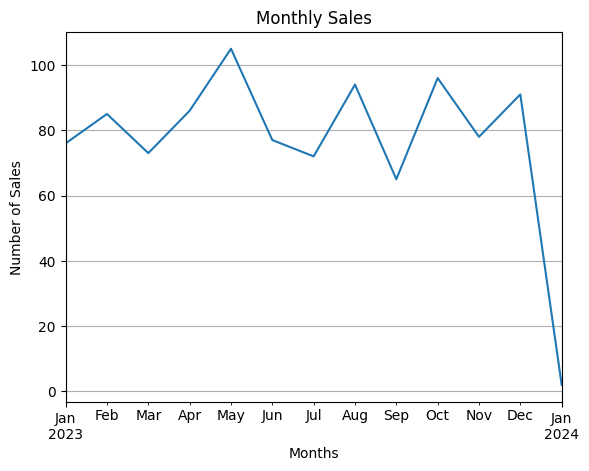

In [29]:
#Monthly Sales data
new_df['Total Amount'].resample('ME').count().plot()
plt.title('Monthly Sales')
plt.xlabel('Months')
plt.ylabel('Number of Sales')
plt.grid()
plt.show()

In [30]:
#week with most sales in the May month
new_df['2023-05-01':'2023-05-31']['Total Amount'].resample('W').count()

Date
2023-05-07    29
2023-05-14    18
2023-05-21    28
2023-05-28    24
2023-06-04     6
Freq: W-SUN, Name: Total Amount, dtype: int64

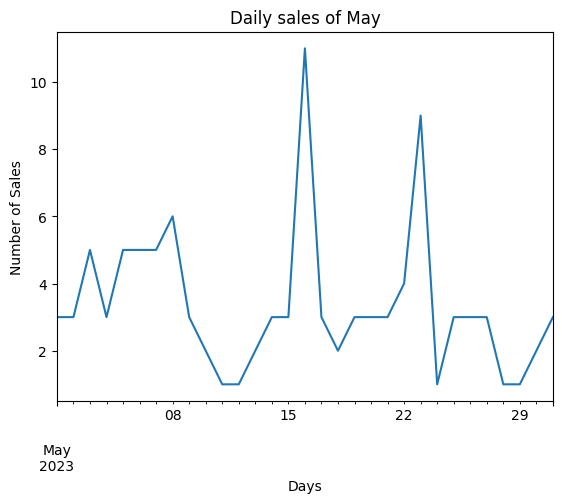

In [31]:
#daily sales of May month
new_df['2023-05-01':'2023-05-31']['Total Amount'].resample('D').count().plot()

plt.title('Daily sales of May')
plt.xlabel('Days')
plt.ylabel('Number of Sales')
plt.show()

*Insight: By seeing the above graph we can say that most sales were done in the month of 'May' of year 2023.*

## 4. Customer and Product Analysis

In [32]:
#for customer analysis lets analyze the data with customer Gender and age

#reset the datetimeindex
new_df.reset_index(inplace=True)
new_df

,Date,Transaction ID,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,2023-01-01,522,CUST522,Male,46,Beauty,3,500,1500
1,2023-01-01,180,CUST180,Male,41,Clothing,3,300,900
2,2023-01-01,559,CUST559,Female,40,Clothing,4,300,1200
3,2023-01-02,303,CUST303,Male,19,Electronics,3,30,90
4,2023-01-02,979,CUST979,Female,19,Beauty,1,25,25
...,...,...,...,...,...,...,...,...,...
995,2023-12-29,233,CUST233,Female,51,Beauty,2,300,600
996,2023-12-29,805,CUST805,Female,30,Beauty,3,500,1500
997,2023-12-31,857,CUST857,Male,60,Electronics,2,25,50
998,2024-01-01,211,CUST211,Male,42,Beauty,3,500,1500


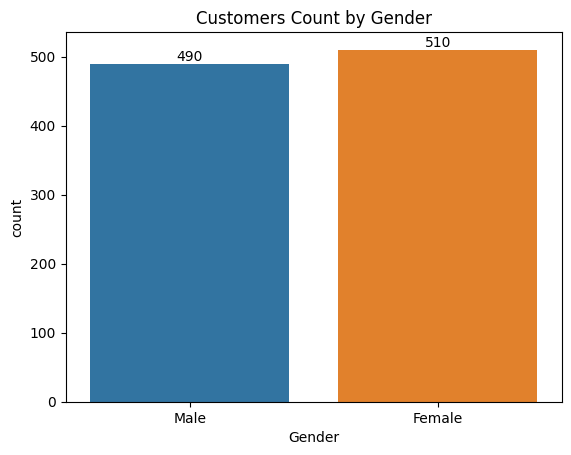

In [33]:
#Gender
#number of customers based on gender
count_by_gen = sns.countplot(x='Gender',data=new_df,hue='Gender')
plt.title('Customers Count by Gender')
#get the count on the bars
for bars in count_by_gen.containers:
    count_by_gen.bar_label(bars)


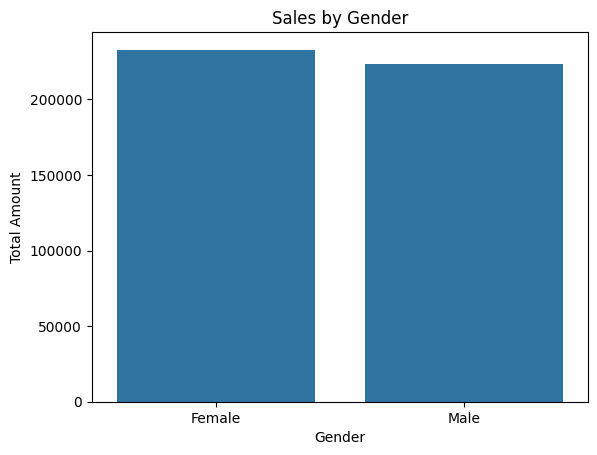

In [34]:
#Sales with each Gender
sales_by_gen = (new_df.groupby(['Gender'],as_index=False)
                    ['Total Amount'].sum().sort_values(by=['Total Amount'],ascending=False))

sns.barplot(x=sales_by_gen.Gender,y=sales_by_gen['Total Amount'],data=sales_by_gen)
plt.title('Sales by Gender')
plt.show()

*Insight: By seeing the above chart we can say that the sales are slightly more with the female customers than the male.*

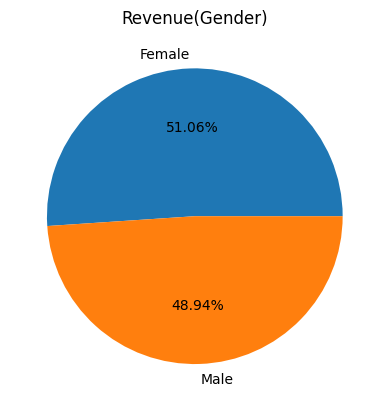

In [35]:
#to get the percentage lets plot the pie plot
plt.pie(sales_by_gen['Total Amount'],labels=sales_by_gen.Gender,autopct='%0.2f%%')
plt.title('Revenue(Gender)')
plt.show()

*Insight: by seeing above graphs we can conclude that Majority of the sales are made with Female customers(51.06%)*

In [36]:
#Age group 
#now lets make a age group column
bins=[18,25,35,45,50,55,100]
group_names=['18-25','26-35','36-45','46-50','51-55','55']
new_df['Age Group']= pd.cut(new_df['Age'],bins,labels=group_names,include_lowest=True)
new_df.head()

,Date,Transaction ID,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Age Group
0,2023-01-01,522,CUST522,Male,46,Beauty,3,500,1500,46-50
1,2023-01-01,180,CUST180,Male,41,Clothing,3,300,900,36-45
2,2023-01-01,559,CUST559,Female,40,Clothing,4,300,1200,36-45
3,2023-01-02,303,CUST303,Male,19,Electronics,3,30,90,18-25
4,2023-01-02,979,CUST979,Female,19,Beauty,1,25,25,18-25


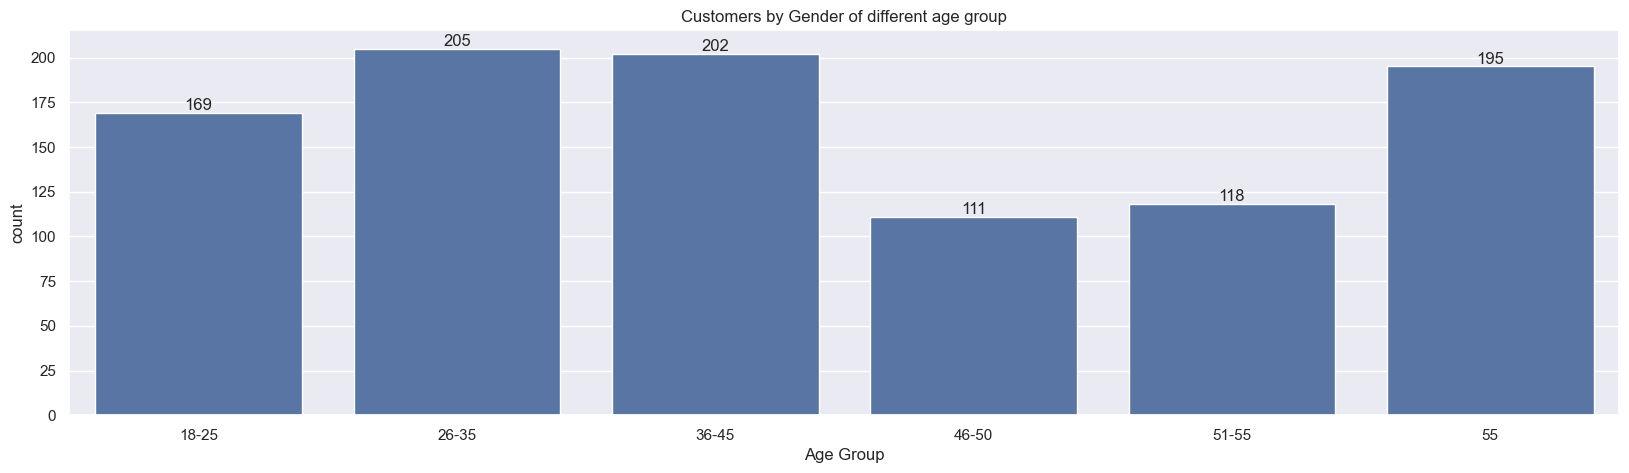

In [37]:
#now get the count of customers based on age group
sns.set(rc={'figure.figsize':(20,5)})
count_by_age = sns.countplot(x='Age Group',data=new_df)
plt.title('Customers by Gender of different age group')


#lets get the count on the bars
for bars in count_by_age.containers:
    count_by_age.bar_label(bars)

*Insight: By seeing above chart we can see that most of the customers are of age group 26-35yrs*

C:\Users\srina\AppData\Local\Temp\ipykernel_18252\3206897124.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_age_grp = (new_df.groupby(['Age Group'],as_index=False)


Text(0.5, 1.0, 'Sales by Age Group')

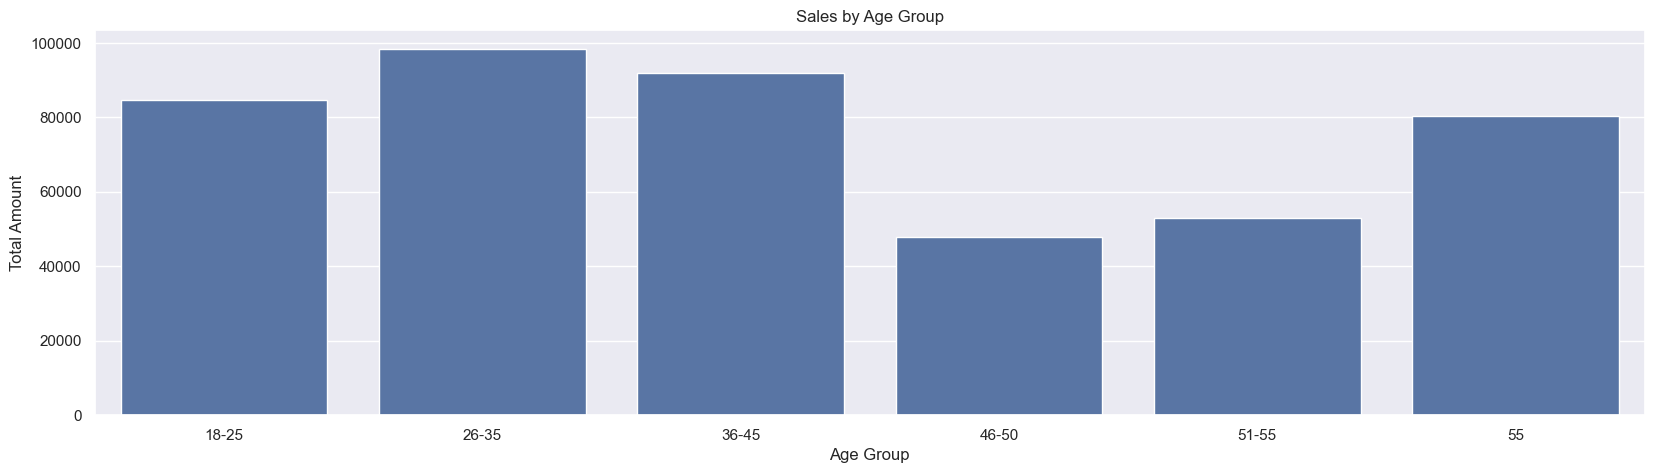

In [38]:
#get the sales of each age group
sales_age_grp = (new_df.groupby(['Age Group'],as_index=False)
                        ['Total Amount'].sum().sort_values(by=['Total Amount'],ascending=False))

sns.barplot(x='Age Group',y='Total Amount',data=sales_age_grp)
plt.title('Sales by Age Group')

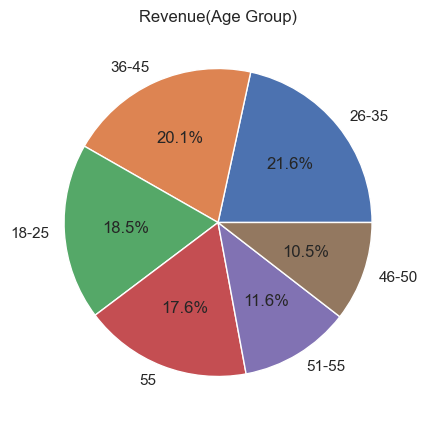

In [175]:
#plot pie chart to get the percentage of sales by each age group
plt.pie(x=sales_age_grp['Total Amount'],labels=sales_age_grp['Age Group'],autopct='%0.1f%%')
plt.title('Revenue(Age Group)')
plt.show()

*Insight: By seeing the above graphs we can say that Most sales was made with customers of age group 26-35yrs*

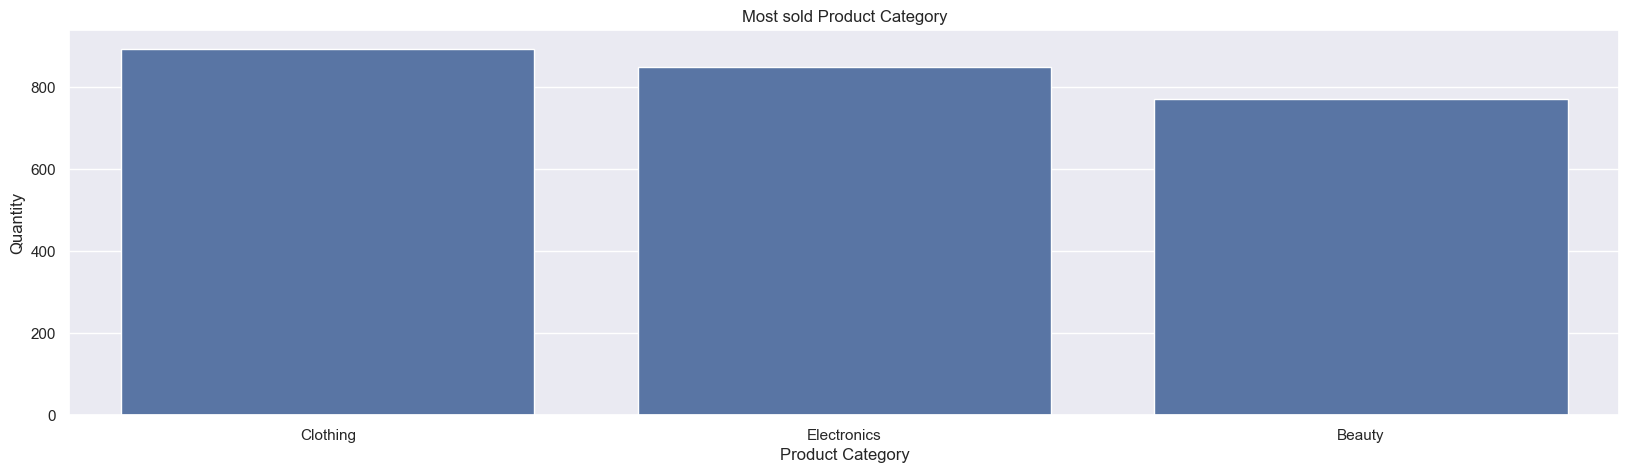

In [186]:
#Product Analysis
#get the products sold count by each category
count_by_prdct = (new_df.groupby(['Product Category'],as_index=False)
                        ['Quantity'].sum().sort_values(by=['Quantity'],ascending=False))

sns.barplot(x='Product Category',y='Quantity',data=count_by_prdct)
plt.title('Most sold Product Category')
plt.show()

*Insight: The most sold products where of the Clothing category*

Text(0.5, 1.0, 'Sales By Product Category')

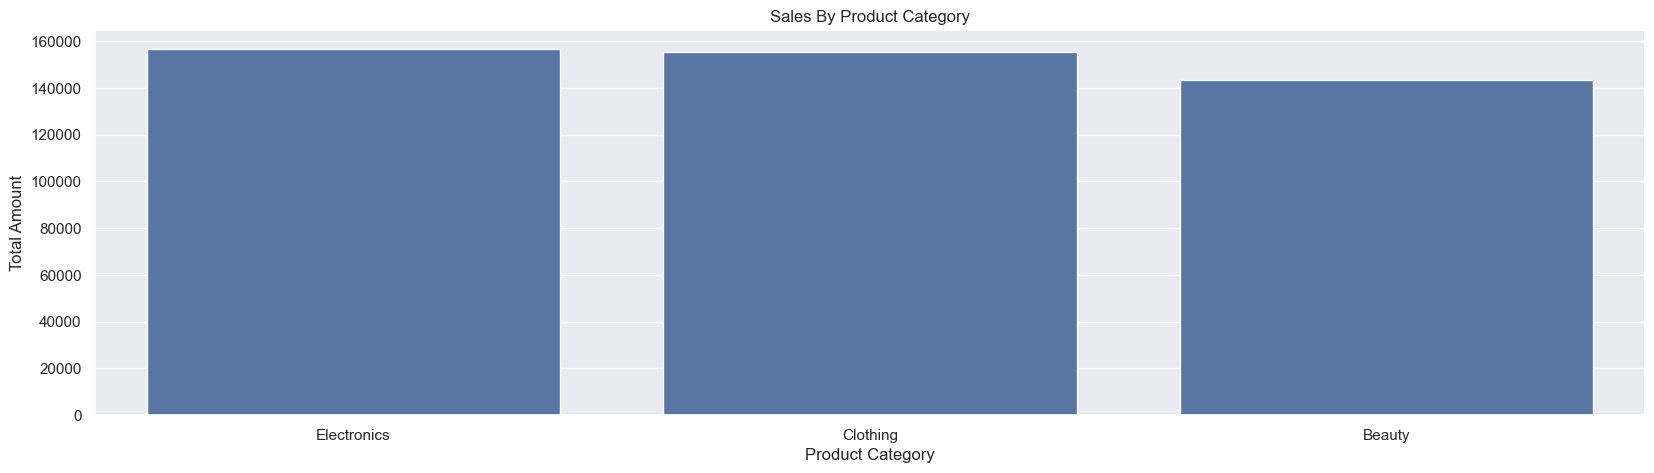

In [168]:
#now lets the amount made by the different category products
sales_by_prdt = (new_df.groupby(['Product Category'],as_index=False)
                 ['Total Amount'].sum().sort_values(by=['Total Amount'],ascending=False))

sns.barplot(x='Product Category',y='Total Amount',data=sales_by_prdt)
plt.title('Sales By Product Category')

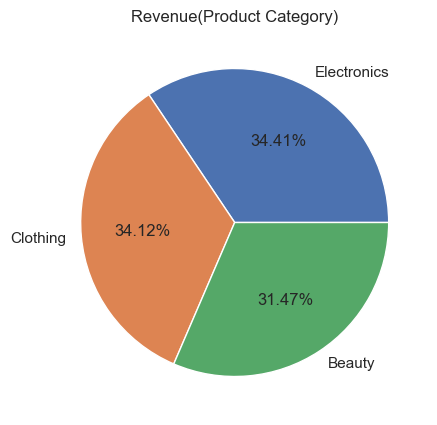

In [176]:
#lets plot pie chart to get the percentage of amount generated by each product category

plt.pie(sales_by_prdt['Total Amount'],labels=sales_by_prdt['Product Category'],autopct='%0.2f%%')
plt.title('Revenue(Product Category)')
plt.show()

*Insight: Eventhough the most sold product category is Clothing, the amount generated by the Electronics Category is slightly more than the Clothing Category.*

In [179]:
#lets check the correlation between price per unit and Total Amount
new_df['Price per Unit'].corr(new_df['Total Amount'])

np.float64(0.851924840355402)

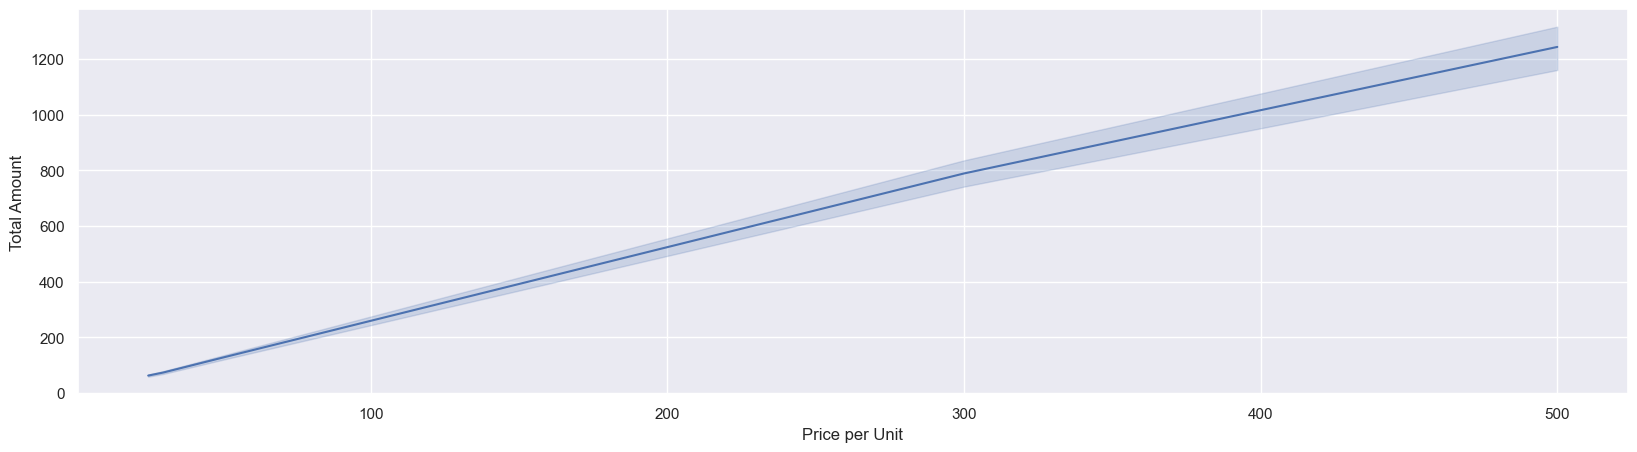

In [181]:
#lets visulaize this to understand better
sns.lineplot(x='Price per Unit',y='Total Amount',data=new_df)
plt.show()

*Insight: we can see that the Total Amount(Revenue generated) is dependent on the Price per Unit. The more the Price per Unit the more the Amount generated.*

### Insights

#### *Most sales were made in the month of May-2023*
#### *Most Orders were made by Women of age 26-35yrs*
#### *Most Orders were made for products of Clothing category*
#### *Most Amount(Revenue) was generated by the Electronics Category*
#### *Revenue generated is proportional to the Price Per Unit of the Product*